# Linear Regression

There are multiple ways to construct a linear regression model using python. Here I use [`scikit-learn`](http://scikit-learn.org/stable/index.html) to investigate linear relationships in the [housing dataset](http://nbviewer.jupyter.org/github/bhlmn/ds/blob/master/docs/ml/data/housing.ipynb). Check out that [link](http://nbviewer.jupyter.org/github/bhlmn/ds/blob/master/docs/ml/data/housing.ipynb) to see some exploratory data analysis (EDA) on this dataset.

Let's begin by importing the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load the housing dataset
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
            'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(data_url, header=None, sep='\s+', names=colnames)

Now we can build the linear regression model. As I mentioned in the [EDA](http://nbviewer.jupyter.org/github/bhlmn/ds/blob/master/docs/ml/data/housing.ipynb), there appears to be a relationship between the number of rooms a house has (**RM**) and the value of that home (**MEDV**). Let's explore the linear relationship between the two.

In [2]:
# use scikit-learn to build the linear model
from sklearn.linear_model import LinearRegression

# we can change x or y to different variables in the dataset to explore those relationships
x = df[['RM']].values
y = df['MEDV'].values
lm = LinearRegression()

# fit the model
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In the next cell I define a function that builds a nice visual to overlay the regression model on top of the data. I'm in the process of building a package that will include this function.

In [3]:
def lm_plot(x, y, model, xlab=None, ylab=None, main=None, size=(7,5), res=100, show=True, col_xy='grey', 
            col_lm='red', font='Arial', show_fit=True, fitloc='top_left'):
    fig, ax = plt.subplots(figsize=size, dpi=res, facecolor='white', edgecolor='k')
    ax.scatter(x, y, c=col_xy, edgecolors='#262626', alpha=0.5)
    ax.plot(x, model.predict(x), color=col_lm, alpha=0.75)
    
    # if we have axis labels
    if xlab != None:
        ax.set_xlabel(xlab, fontname=font)
    if ylab != None:
        ax.set_ylabel(ylab, fontname=font)
    if main != None:
        ax.set_title(main, fontname=font)
        
    # set font for tick marks
    for tick in ax.get_xticklabels():
        tick.set_fontname(font)
    for tick in ax.get_yticklabels():
        tick.set_fontname(font)
        
    # remove top and right axes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Show equation and R squared
    if show_fit:
        text_x, text_y = [0.15, 0.9]
        if fitloc == 'top_right':
            text_x, text_y = [0.85, 0.9]
        if fitloc == 'bottom_left':
            text_x, text_y = [0.15, 0.15]
        if fitloc == 'bottom_right':
            text_x, text_y = [0.85, 0.15]
        eq_text = 'y = %.2f + %.2fx' % (model.intercept_, model.coef_[0])
        if model.coef_[0] < 0:
            eq_text = 'y = %.2f - %.2fx' % (model.intercept_, abs(model.coef_[0]))
        plt.text(text_x, text_y, eq_text, ha='center', va='center', transform=ax.transAxes, fontname=font)
        from sklearn.metrics import r2_score
        r2_text = 'R^2 = %.3f' % r2_score(y, lm.predict(x))
        plt.text(text_x, text_y - 0.05, r2_text, ha='center', va='center', transform=ax.transAxes, fontname=font)

    if show:
        plt.show()
    return None

Now let's run this function, inputting our data and the regression model to create the visual.

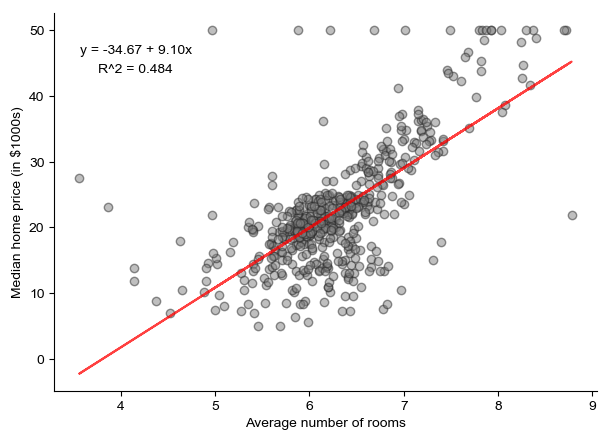

In [4]:
lm_plot(x, y, lm, xlab='Average number of rooms', ylab='Median home price (in $1000s)')

There is a very clear positive trend here! Seems that, on average, each additional room increases the value of the home by $9k.